In [129]:
import pandas as pd
import tensorflow as tf
import os
import numpy as np
import matplotlib.pyplot as plt
import time

In [130]:
drought = pd.read_csv('temperature and precipitation/final_drought_temp_data.csv')

In [131]:
drought.shape

(47025, 22)

In [132]:
drought.head()

,ValidEnd,Name,state,area_none,area_d0,area_d1,area_d2,area_d3,area_d4,population_none,...,population_d2,population_d3,population_d4,DSCI,total_area,total_population,avg_tmax,avg_tmin,total_avg_prcp_inches,total_avg_prcp_mm
0,2021-01-04,Alabama,AL,47712.19,3892.15,0.0,0.0,0.0,0.0,4596699.61,...,0.0,0.0,0.0,8,51604.34,4779736.02,67.940000,41.450000,0.000,0.0000
1,2020-12-28,Alabama,AL,39068.95,12535.39,0.0,0.0,0.0,0.0,4038013.82,...,0.0,0.0,0.0,24,51604.34,4779736.02,57.797143,30.522857,1.440,36.5760
2,2020-12-21,Alabama,AL,39068.95,12535.40,0.0,0.0,0.0,0.0,4038013.43,...,0.0,0.0,0.0,24,51604.35,4779736.02,53.634286,34.314286,0.354,8.9916
3,2020-12-14,Alabama,AL,42812.87,8791.48,0.0,0.0,0.0,0.0,4239664.15,...,0.0,0.0,0.0,17,51604.35,4779736.02,64.145714,38.808571,1.236,31.3944
4,2020-12-07,Alabama,AL,45608.51,5995.84,0.0,0.0,0.0,0.0,4483976.48,...,0.0,0.0,0.0,12,51604.35,4779736.02,55.377143,31.965714,0.852,21.6408


In [133]:
drought.tail()

,ValidEnd,Name,state,area_none,area_d0,area_d1,area_d2,area_d3,area_d4,population_none,...,population_d2,population_d3,population_d4,DSCI,total_area,total_population,avg_tmax,avg_tmin,total_avg_prcp_inches,total_avg_prcp_mm
47020,2001-01-29,Wyoming,WY,19865.21,77933.41,0.0,0.0,0.0,0.0,141431.33,...,0.0,0.0,0.0,80,97798.62,563626.0,28.571429,11.928571,0.115,2.921
47021,2001-01-22,Wyoming,WY,69093.43,28705.19,0.0,0.0,0.0,0.0,415072.66,...,0.0,0.0,0.0,29,97798.62,563626.0,28.000000,9.285714,0.085,2.159
47022,2001-01-15,Wyoming,WY,69093.43,28705.19,0.0,0.0,0.0,0.0,415072.66,...,0.0,0.0,0.0,29,97798.62,563626.0,34.642857,14.142857,0.070,1.778
47023,2001-01-08,Wyoming,WY,40340.46,57458.16,0.0,0.0,0.0,0.0,287015.91,...,0.0,0.0,0.0,59,97798.62,563626.0,40.285714,17.785714,0.000,0.000
47024,2001-01-01,Wyoming,WY,40340.46,57458.16,0.0,0.0,0.0,0.0,287015.91,...,0.0,0.0,0.0,59,97798.62,563626.0,33.000000,7.000000,0.005,0.127


In [134]:
drought['climate_regions']=drought['Name']

#### David's Code

In [135]:
oh='Ohio Valley'
ohio_valley=dict.fromkeys(['Illinois','Indiana','Kentucky','Missouri',
             'Ohio','Tennessee','West Virginia'],oh)
#https://stackoverflow.com/questions/11977730/creating-a-dictionary-with-same-values
ohio_valley

{'Illinois': 'Ohio Valley',
 'Indiana': 'Ohio Valley',
 'Kentucky': 'Ohio Valley',
 'Missouri': 'Ohio Valley',
 'Ohio': 'Ohio Valley',
 'Tennessee': 'Ohio Valley',
 'West Virginia': 'Ohio Valley'}

In [136]:
oh_list=['Illinois','Indiana','Kentucky','Missouri',
             'Ohio','Tennessee','West Virginia']

In [137]:
def state_region_dict(list_states,string_region):
    return dict.fromkeys(list_states,string_region)
#function to combine states and region into dictionary


In [138]:
um_list=['Iowa', 'Michigan', 'Minnesota', 'Wisconsin']
um_region='Upper Midwest'
upper_midwest=state_region_dict(um_list,um_region)
upper_midwest

{'Iowa': 'Upper Midwest',
 'Michigan': 'Upper Midwest',
 'Minnesota': 'Upper Midwest',
 'Wisconsin': 'Upper Midwest'}

In [139]:
ne_list=['Connecticut','Delaware','Maine','Maryland','Massachusetts', 'New Hampshire', 'New Jersey',
        'New York', 'Pennsylvania','Rhode Island','Vermont']
ne_region='Northeast'
north_east=state_region_dict(ne_list,ne_region)
north_east

{'Connecticut': 'Northeast',
 'Delaware': 'Northeast',
 'Maine': 'Northeast',
 'Maryland': 'Northeast',
 'Massachusetts': 'Northeast',
 'New Hampshire': 'Northeast',
 'New Jersey': 'Northeast',
 'New York': 'Northeast',
 'Pennsylvania': 'Northeast',
 'Rhode Island': 'Northeast',
 'Vermont': 'Northeast'}

In [140]:
nw_list=['Idaho','Oregon','Washington']
nw_region='Northwest'
north_west=state_region_dict(nw_list,nw_region)

s_list=['Arkansas','Kansas','Louisiana','Mississippi','Oklahoma','Texas']
s_region='South'
south=state_region_dict(s_list,s_region)

se_list=['Alabama','Florida','Georgia','North Carolina','South Carolina','Virginia']
se_region='Southeast'
south_east=state_region_dict(se_list,se_region)

sw_list=['Arizona','Colorado','New Mexico','Utah']
sw_region='Southwest'
south_west=state_region_dict(sw_list,sw_region)

w_list=['California','Nevada']
w_region='West'
west=state_region_dict(w_list,w_region)

wnc_list=['Montana','Nebraska','North Dakota','South Dakota','Wyoming']
wnc_region='Northern Rockies and Plains'
northern_rockies=state_region_dict(wnc_list,wnc_region)

In [141]:
final_dict={**ohio_valley,**upper_midwest,**north_east,**north_west,**south,
            **south_east,**south_west,**west,**northern_rockies}
final_dict
#combine multiple dictionaries into one
#https://towardsdatascience.com/merge-dictionaries-in-python-d4e9ce137374

{'Illinois': 'Ohio Valley',
 'Indiana': 'Ohio Valley',
 'Kentucky': 'Ohio Valley',
 'Missouri': 'Ohio Valley',
 'Ohio': 'Ohio Valley',
 'Tennessee': 'Ohio Valley',
 'West Virginia': 'Ohio Valley',
 'Iowa': 'Upper Midwest',
 'Michigan': 'Upper Midwest',
 'Minnesota': 'Upper Midwest',
 'Wisconsin': 'Upper Midwest',
 'Connecticut': 'Northeast',
 'Delaware': 'Northeast',
 'Maine': 'Northeast',
 'Maryland': 'Northeast',
 'Massachusetts': 'Northeast',
 'New Hampshire': 'Northeast',
 'New Jersey': 'Northeast',
 'New York': 'Northeast',
 'Pennsylvania': 'Northeast',
 'Rhode Island': 'Northeast',
 'Vermont': 'Northeast',
 'Idaho': 'Northwest',
 'Oregon': 'Northwest',
 'Washington': 'Northwest',
 'Arkansas': 'South',
 'Kansas': 'South',
 'Louisiana': 'South',
 'Mississippi': 'South',
 'Oklahoma': 'South',
 'Texas': 'South',
 'Alabama': 'Southeast',
 'Florida': 'Southeast',
 'Georgia': 'Southeast',
 'North Carolina': 'Southeast',
 'South Carolina': 'Southeast',
 'Virginia': 'Southeast',
 'Arizona

In [142]:
print(len(final_dict.keys()))

48


In [143]:
drought['climate_regions']=drought['Name']

In [144]:
#Replaced initial values with dictionary region values
drought.replace({'climate_regions':final_dict},inplace=True)
#https://sparkbyexamples.com/pandas/pandas-remap-values-in-column-with-a-dictionary-dict/

In [145]:
drought.head()

,ValidEnd,Name,state,area_none,area_d0,area_d1,area_d2,area_d3,area_d4,population_none,...,population_d3,population_d4,DSCI,total_area,total_population,avg_tmax,avg_tmin,total_avg_prcp_inches,total_avg_prcp_mm,climate_regions
0,2021-01-04,Alabama,AL,47712.19,3892.15,0.0,0.0,0.0,0.0,4596699.61,...,0.0,0.0,8,51604.34,4779736.02,67.940000,41.450000,0.000,0.0000,Southeast
1,2020-12-28,Alabama,AL,39068.95,12535.39,0.0,0.0,0.0,0.0,4038013.82,...,0.0,0.0,24,51604.34,4779736.02,57.797143,30.522857,1.440,36.5760,Southeast
2,2020-12-21,Alabama,AL,39068.95,12535.40,0.0,0.0,0.0,0.0,4038013.43,...,0.0,0.0,24,51604.35,4779736.02,53.634286,34.314286,0.354,8.9916,Southeast
3,2020-12-14,Alabama,AL,42812.87,8791.48,0.0,0.0,0.0,0.0,4239664.15,...,0.0,0.0,17,51604.35,4779736.02,64.145714,38.808571,1.236,31.3944,Southeast
4,2020-12-07,Alabama,AL,45608.51,5995.84,0.0,0.0,0.0,0.0,4483976.48,...,0.0,0.0,12,51604.35,4779736.02,55.377143,31.965714,0.852,21.6408,Southeast


In [146]:
drought['ValidEnd'] = pd.to_datetime(drought['ValidEnd'])

In [147]:
drought = drought[drought['ValidEnd']<'2021-01-01']

In [148]:
ohio_valley = drought[drought['climate_regions'] == 'Ohio Valley']

In [156]:
west = drought[drought['climate_regions'] == 'West']

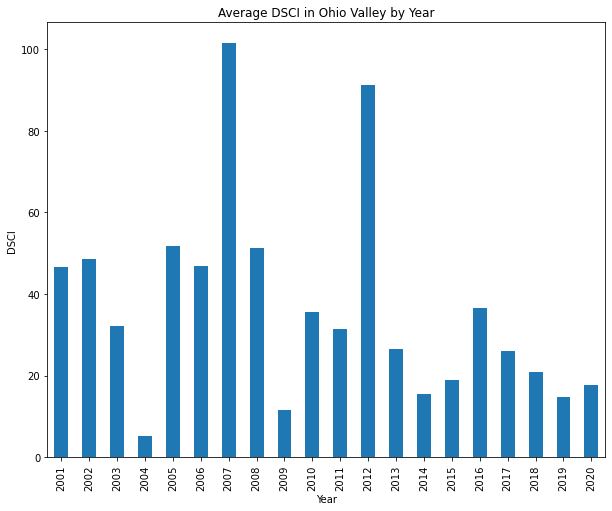

In [149]:
def plot_avg_dsci(reg):
    years = reg.groupby(reg['ValidEnd'].dt.year)['DSCI'].mean()
    years.plot(kind = 'bar', figsize = (10, 8))
    plt.xlabel("Year")
    plt.ylabel("DSCI")
    plt.title(f'Average DSCI in {reg["climate_regions"].iloc[1]} by Year')
plot_avg_dsci(ohio_valley)

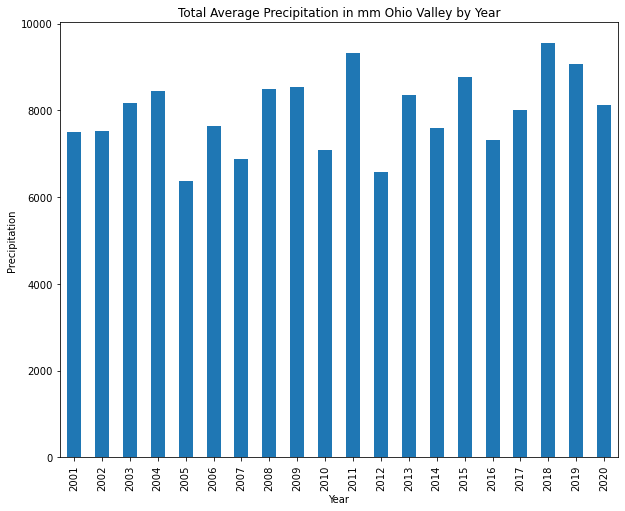

In [150]:
def plot_sum_prcp(reg):
    years = reg.groupby(reg['ValidEnd'].dt.year)['total_avg_prcp_mm'].sum()
    years.plot(kind = 'bar', figsize = (10, 8))
    plt.xlabel("Year")
    plt.ylabel("Precipitation")
    plt.title(f'Total Average Precipitation in mm {reg["climate_regions"].iloc[1]} by Year')
plot_sum_prcp(ohio_valley)

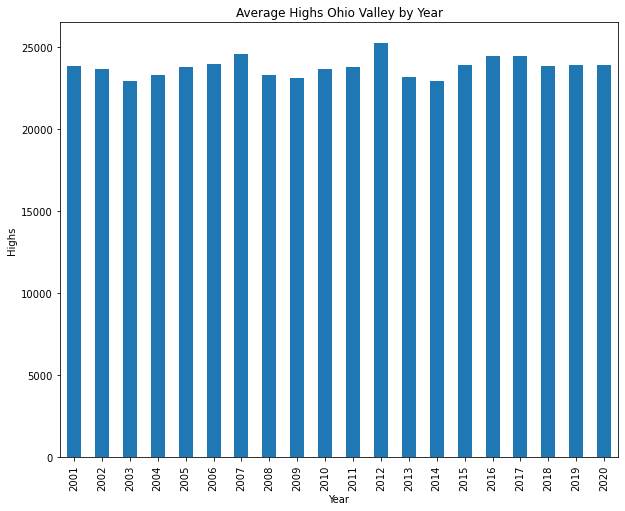

In [161]:
def plot_avg_tmax(reg):
    years = reg.groupby(reg['ValidEnd'].dt.year)['avg_tmax'].sum()
    years.plot(kind = 'bar', figsize = (10, 8))
    plt.xlabel("Year")
    plt.ylabel("Highs")
    plt.title(f'Average Highs {reg["climate_regions"].iloc[1]} by Year')
plot_avg_tmax(ohio_valley)

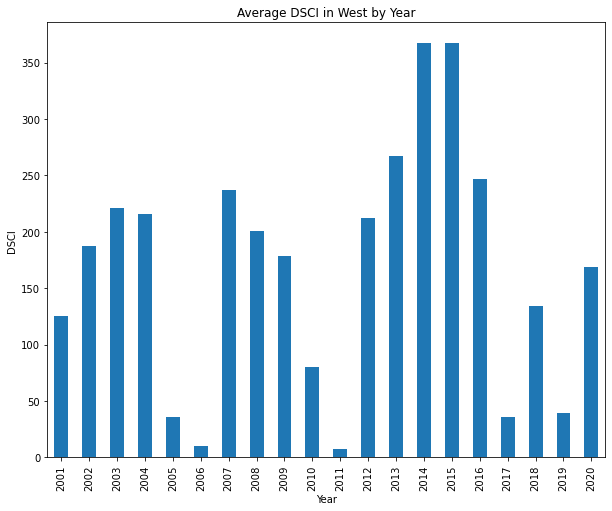

In [158]:
plot_avg_dsci(west)

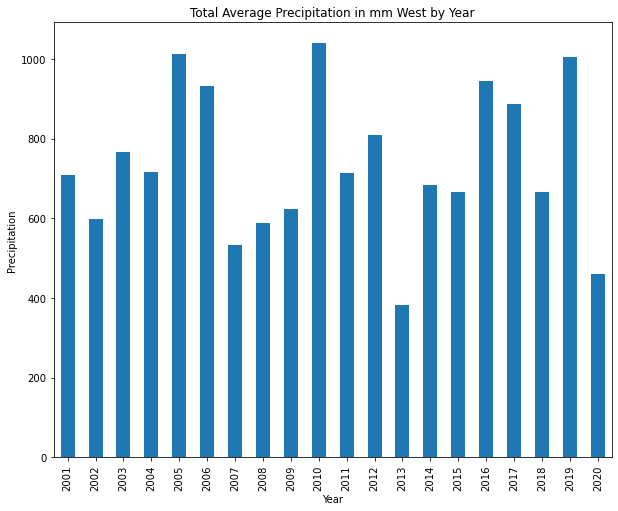

In [159]:
plot_sum_prcp(west)

In [152]:
cdishfs(ff)

NameError: name 'cdishfs' is not defined

In [ ]:
def nine_regions(state_list):
    return drought[drought['Name'].isin(state_list)]

In [ ]:
ohio_valley=nine_regions(oh_list)

ohio_valley

,ValidEnd,Name,state,area_none,area_d0,area_d1,area_d2,area_d3,area_d4,population_none,...,population_d3,population_d4,DSCI,total_area,total_population,avg_tmax,avg_tmin,total_avg_prcp_inches,total_avg_prcp_mm,climate_regions
10451,2020-12-28,Illinois,IL,33454.57,15550.66,6236.48,1140.83,0.0,0.0,8875219.25,...,0.0,0.0,56,56382.54,12847389.79,38.465714,17.117143,0.108000,2.743200,Ohio Valley
10452,2020-12-21,Illinois,IL,33454.57,15550.66,6236.48,1140.83,0.0,0.0,8875219.25,...,0.0,0.0,56,56382.54,12847389.79,39.528571,26.411429,0.006000,0.152400,Ohio Valley
10453,2020-12-14,Illinois,IL,32814.14,16191.10,6236.48,1140.83,0.0,0.0,8839298.46,...,0.0,0.0,57,56382.55,12847389.79,44.220000,29.057143,1.026000,26.060400,Ohio Valley
10454,2020-12-07,Illinois,IL,32794.13,18023.24,4619.65,945.53,0.0,0.0,8650968.46,...,0.0,0.0,53,56382.55,12847389.80,43.485714,24.954286,0.000000,0.000000,Ohio Valley
10455,2020-11-30,Illinois,IL,28067.62,21244.44,6124.95,945.53,0.0,0.0,8375517.01,...,0.0,0.0,64,56382.54,12847389.80,46.328571,32.782857,1.082000,27.482800,Ohio Valley
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45975,2001-01-29,West Virginia,WV,3547.74,19253.58,1403.34,0.00,0.0,0.0,261876.40,...,0.0,0.0,91,24204.66,1852994.01,40.380952,19.880952,0.223333,5.672667,Ohio Valley
45976,2001-01-22,West Virginia,WV,5496.60,14287.99,3143.43,1276.64,0.0,0.0,443651.89,...,0.0,0.0,101,24204.66,1852994.00,35.142857,23.095238,1.165000,29.591000,Ohio Valley
45977,2001-01-15,West Virginia,WV,7763.39,12021.20,3143.44,1276.64,0.0,0.0,664684.83,...,0.0,0.0,91,24204.67,1852994.00,43.904762,24.714286,0.008333,0.211667,Ohio Valley
45978,2001-01-08,West Virginia,WV,7763.16,12391.29,3670.41,379.81,0.0,0.0,664647.42,...,0.0,0.0,86,24204.67,1852993.99,33.119048,21.452381,0.055000,1.397000,Ohio Valley


In [ ]:
ohio_valley

,ValidEnd,Name,state,area_none,area_d0,area_d1,area_d2,area_d3,area_d4,population_none,...,population_d3,population_d4,DSCI,total_area,total_population,avg_tmax,avg_tmin,total_avg_prcp_inches,total_avg_prcp_mm,climate_regions
10451,2020-12-28,Illinois,IL,33454.57,15550.66,6236.48,1140.83,0.0,0.0,8875219.25,...,0.0,0.0,56,56382.54,12847389.79,38.465714,17.117143,0.108000,2.743200,Ohio Valley
10452,2020-12-21,Illinois,IL,33454.57,15550.66,6236.48,1140.83,0.0,0.0,8875219.25,...,0.0,0.0,56,56382.54,12847389.79,39.528571,26.411429,0.006000,0.152400,Ohio Valley
10453,2020-12-14,Illinois,IL,32814.14,16191.10,6236.48,1140.83,0.0,0.0,8839298.46,...,0.0,0.0,57,56382.55,12847389.79,44.220000,29.057143,1.026000,26.060400,Ohio Valley
10454,2020-12-07,Illinois,IL,32794.13,18023.24,4619.65,945.53,0.0,0.0,8650968.46,...,0.0,0.0,53,56382.55,12847389.80,43.485714,24.954286,0.000000,0.000000,Ohio Valley
10455,2020-11-30,Illinois,IL,28067.62,21244.44,6124.95,945.53,0.0,0.0,8375517.01,...,0.0,0.0,64,56382.54,12847389.80,46.328571,32.782857,1.082000,27.482800,Ohio Valley
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45975,2001-01-29,West Virginia,WV,3547.74,19253.58,1403.34,0.00,0.0,0.0,261876.40,...,0.0,0.0,91,24204.66,1852994.01,40.380952,19.880952,0.223333,5.672667,Ohio Valley
45976,2001-01-22,West Virginia,WV,5496.60,14287.99,3143.43,1276.64,0.0,0.0,443651.89,...,0.0,0.0,101,24204.66,1852994.00,35.142857,23.095238,1.165000,29.591000,Ohio Valley
45977,2001-01-15,West Virginia,WV,7763.39,12021.20,3143.44,1276.64,0.0,0.0,664684.83,...,0.0,0.0,91,24204.67,1852994.00,43.904762,24.714286,0.008333,0.211667,Ohio Valley
45978,2001-01-08,West Virginia,WV,7763.16,12391.29,3670.41,379.81,0.0,0.0,664647.42,...,0.0,0.0,86,24204.67,1852993.99,33.119048,21.452381,0.055000,1.397000,Ohio Valley


In [ ]:
#julio's code
ohio_valley=ohio_valley.groupby('ValidEnd').agg({'area_none':'sum','area_d0':'sum','area_d1':'sum','area_d2':'sum','area_d3':'sum','area_d4':'sum',
                                                  'population_none':'sum','population_d0':'sum','population_d1':'sum','population_d2':'sum','population_d3':'sum',
                                                  'population_d4':'sum','DSCI':'mean','total_population':'sum','total_area':'sum', 'avg_tmax': 'mean', 'avg_tmin': 'mean', 'total_avg_prcp_inches':'sum', 'total_avg_prcp_mm': 'sum'})

In [ ]:
ohio_valley.head(20)

,area_none,area_d0,area_d1,area_d2,area_d3,area_d4,population_none,population_d0,population_d1,population_d2,population_d3,population_d4,DSCI,total_population,total_area,avg_tmax,avg_tmin,total_avg_prcp_inches,total_avg_prcp_mm
ValidEnd,,,,,,,,,,,,,,,,,,,
2001-01-01,227422.55,44289.79,22365.97,14637.13,1611.11,0.0,40566223.47,4100148.67,1496478.27,2918530.30,313707.91,0.0,50.428571,49395088.62,310326.55,23.354082,10.183673,0.099619,2.530324
2001-01-08,227422.55,44188.03,22467.79,14427.90,1820.26,0.0,40566223.47,4099124.06,1497552.35,2859142.85,373045.88,0.0,50.714286,49395088.61,310326.53,34.573178,18.315841,0.292024,7.417405
2001-01-15,207340.13,57004.10,20925.29,20331.36,4725.64,0.0,39123425.97,4684835.33,1712937.10,3002106.22,871783.99,0.0,61.285714,49395088.61,310326.52,40.542177,25.301118,1.467833,37.282967
2001-01-22,203962.84,60381.41,20925.60,20331.03,4725.64,0.0,38787217.08,5021045.51,1712939.16,3002102.87,871783.99,0.0,63.000000,49395088.61,310326.52,34.340087,21.396890,4.693262,119.208852
2001-01-29,99873.35,165442.98,21698.61,23311.58,0.00,0.0,27208959.79,16423603.45,2361031.76,3401493.61,0.00,0.0,89.428571,49395088.61,310326.52,39.176385,21.357483,5.319095,135.105019
2001-02-05,189351.82,81324.17,23903.67,15746.84,0.00,0.0,37186270.26,6710507.60,3435134.17,2063176.59,0.00,0.0,61.571429,49395088.62,310326.50,40.754227,24.969776,1.697833,43.124967
2001-02-12,190149.25,81190.13,23240.28,15746.86,0.00,0.0,37218607.58,6701593.27,3411694.48,2063193.30,0.00,0.0,61.000000,49395088.63,310326.52,48.984354,28.169145,5.753667,146.143133
2001-02-19,210396.84,55185.74,33460.12,11157.14,126.68,0.0,38926195.58,4596067.64,3902177.74,1953907.72,16739.92,0.0,58.857143,49395088.60,310326.52,43.798202,28.861030,9.398048,238.710410
2001-02-26,260223.38,36679.13,8636.36,4533.19,254.47,0.0,43169828.49,3714585.98,1758898.37,723745.45,28030.31,0.0,25.285714,49395088.60,310326.53,47.759232,29.694461,8.029381,203.946276


In [ ]:
drought.shape

(46980, 23)

In [162]:
drought['climate_regions'].value_counts()

Northeast                      8352
Ohio Valley                    7308
Southeast                      6264
South                          6264
Northern Rockies and Plains    5220
Upper Midwest                  4176
Southwest                      4176
Northwest                      3132
West                           2088
Name: climate_regions, dtype: int64

In [163]:
drought['Name'].value_counts()

Missouri          1044
Wisconsin         1044
New Hampshire     1044
Wyoming           1044
Arkansas          1044
Tennessee         1044
Florida           1044
North Carolina    1044
Indiana           1044
New Jersey        1044
Georgia           1044
Nebraska          1044
Utah              1044
South Carolina    1044
Arizona           1044
Maryland          1044
Louisiana         1044
Delaware          1044
California        1044
Michigan          1044
Vermont           1044
Iowa              1044
Texas             1044
Minnesota         1044
Oklahoma          1044
Kentucky          1044
Maine             1044
South Dakota      1044
West Virginia     1044
Oregon            1044
Mississippi       1044
Virginia          1044
North Dakota      1044
New York          1044
Colorado          1044
Montana           1044
Alabama           1044
New Mexico        1044
Ohio              1044
Nevada            1044
Idaho             1044
Massachusetts     1044
Illinois          1044
Washington 